# Logistic Regression
## Group 19

### Objective:
- Learned what Logistic Regression is
- Learned how  Logistic Regression works
- Learned how to implement Logistic Regression using sklearn


### References:
- https://www.kaggle.com/code/prashant111/logistic-regression-classifier-tutorial#18.-ROC---AUC-
- https://www.geeksforgeeks.org/ml-heart-disease-prediction-using-logistic-regression/
- https://www.ibm.com/topics/logistic-regression
- https://coresignal.com/blog/data-normalization/#:~:text=The%20main%20objective%20of%20database,increase%20security%2C%20and%20lessen%20costs.

### What is Logistic Regression?

This type of statistical model (also known as logit model) is often used for classification and predictive analytics. Logistic regression estimates the probability of an event occurring, such as voted or didn’t vote, based on a given dataset of independent variables. Since the outcome is a probability, the dependent variable is bounded between 0 and 1. In logistic regression, a logit transformation is applied on the odds—that is, the probability of success divided by the probability of failure. This is also commonly known as the log odds, or the natural logarithm of odds, and this logistic function is represented by the following formulas: 

### Logistic Regression Formulas

The logistic regression model is expressed using the following formulas:

1. **Logit Function:**
   $$ \text{Logit}(\pi) = \frac{1}{1 + e^{-\pi}} $$

   Where ${\pi}$ is the log-odds of the probability.

2. **Log-Odds Relationship:**
   $$ \ln\left(\frac{\pi}{1-\pi}\right) = \beta_0 + \beta_1 X_1 + \ldots + \beta_k X_k $$

   Here:
   - ${\pi}$ is the probability of the dependent variable being 1 (success or positive class).
   - ${e}$ is the base of the natural logarithm.
   - ${\beta_0, \beta_1, \ldots, \beta_k}$ are the coefficients associated with the independent variables ${X_0, X_1, \ldots, X_k}$.
   - ${X_0, X_1, \ldots, X_k}$ are the input features.

These formulas describe the relationship between the log-odds of the event occurring and the input features in logistic regression.


### When to use Logistic Regression?

Logistic regression is commonly used for prediction and classification problems. Some of these use cases include:

- __Fraud Detection__: Logistic regression models can help teams identify data anomalies, which are predictive of fraud. Certain behaviors or characteristics may have a higher association with fraudulent activities, which is particularly helpful to banking and other financial institutions in protecting their clients. SaaS-based companies have also started to adopt these practices to eliminate fake user accounts from their datasets when conducting data analysis around business performance.

- __Disease Prediction__: In medicine, this analytics approach can be used to predict the likelihood of disease or illness for a given population. Healthcare organizations can set up preventative care for individuals that show higher propensity for specific illnesses.

- __Churn Prediction__: Specific behaviors may be indicative of churn in different functions of an organization. For example, human resources and management teams may want to know if there are high performers within the company who are at risk of leaving the organization; this type of insight can prompt conversations to understand problem areas within the company, such as culture or compensation. Alternatively, the sales organization may want to learn which of their clients are at risk of taking their business elsewhere. This can prompt teams to set up a retention strategy to avoid lost revenue.

### Types of Logistic Regression

1. __Binary logistic regression__: In this approach, the response or dependent variable is dichotomous in nature—i.e. it has only two possible outcomes (e.g. 0 or 1). Some popular examples of its use include predicting if an e-mail is spam or not spam or if a tumor is malignant or not malignant. Within logistic regression, this is the most commonly used approach, and more generally, it is one of the most common classifiers for binary classification.

2. __Multinomial logistic regression__: In this type of logistic regression model, the dependent variable has three or more possible outcomes; however, these values have no specified order.  For example, movie studios want to predict what genre of film a moviegoer is likely to see to market films more effectively. A multinomial logistic regression model can help the studio to determine the strength of influence a person's age, gender, and dating status may have on the type of film that they prefer. The studio can then orient an advertising campaign of a specific movie toward a group of people likely to go see it.

3. __Ordinal logistic regression__: This type of logistic regression model is leveraged when the response variable has three or more possible outcome, but in this case, these values do have a defined order. Examples of ordinal responses include grading scales from A to F or rating scales from 1 to 5. 

Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import sklearn
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import jaccard_score

%matplotlib inline

In [2]:
file_path = 'C:\\Users\\User\\Desktop\\MMU\\Y3S1\\TDS3851_ML\\Datasets\\bank.csv'


# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the head of the DataFrame in a table format
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


### Training and Test Sets: Splitting Data | Normalization of the Dataset

Database normalization is the process of structuring a database according to what’s called normal forms, with the final product being a relational database, free from data redundancy. More specifically, normalization involves organizing data based on assigned attributes as a part of a larger data model. The main objective of database normalization is to eliminate redundant data, minimize data modification errors, and simplify the query process.

Ultimately, normalization goes beyond simply standardizing data, and can even improve workflow, increase security, and lessen costs. This article will unpack the significance of database normalization, its basic structure, as well as the advantages of normalization. Let’s first take a look at why normalization is important and who uses it.

### Advantages of data normalization

1. __Improved overall database organization__
    
    After normalization, your database will be structured and arranged in a way that is logical for all departments company-wide. With increased organization, duplication and location errors will be minimized and outdated versions of data can be more easily updated.

2. __Data consistency__

    Consistent data is crucial for all teams within a business to stay on the same page. Data normalization will ensure consistency across development, research, and sales teams. Consistent data will also improve workflow between departments and align their information sets.

3. __Reduces redundancy__

    Redundancy is a commonly overlooked data storage issue. Reducing redundancy will ultimately help reduce file size and therefore speed up analysis and data processing time.

4. __Cost reduction__

    Cost reduction due to normalization involves a culmination of the previously mentioned benefits. For instance, if file size is reduced, data storage and processors won’t need to be as large. Additionally, increased workflow due to consistency and organization will ensure that all employees are able to access the database information as quickly as possible, saving time for other necessary tasks.

5. __Increased security__

    Because normalization requires that data is more accurately located and uniformly organized, security is significantly increased.

In [3]:
def preprocess_and_normalize(data):
    # Extract features (X) and target variable (y)
    X = data[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
              'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
              'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed']]
    y = data['y']

    # Convert categorical columns to one-hot encoding
    X = pd.get_dummies(X, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'])

    # Extract numeric features
    X_numeric = X[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
                   'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed']]

    # Normalize numeric features
    X_numeric_normalized = preprocessing.StandardScaler().fit_transform(X_numeric)

    # Combine normalized numeric features with one-hot encoded categorical features
    X_normalized = np.concatenate((X_numeric_normalized, X.drop(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
                                                                 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed'], axis=1)), axis=1)

    return X_normalized, y

# Preprocess and normalize the bank dataset
X, y = preprocess_and_normalize(df)

# Print one example of normalized data
normalized_example = pd.DataFrame(X)
print('Normalized Data:')
print(normalized_example.head(1))

# Train-and-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Normalized Data:
         0        1         2         3         4         5         6   \
0  0.381527 -0.18623 -0.565922  0.195414 -0.349494  0.839061 -0.227465   

         7         8        9   ...   53   54   55   56   57   58   59   60  \
0  0.951267  0.773575  0.84517  ...  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   

    61   62  
0  1.0  0.0  

[1 rows x 63 columns]
Train set: (28831, 63) (28831,)
Test set: (12357, 63) (12357,)


### Modeling of the Dataset | Evaluation and Accuracy : 

In [4]:
# Train Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model using Jaccard similarity score
accuracy = jaccard_score(y_test, y_pred)
print('Accuracy of the model in Jaccard similarity score is = ', accuracy)

Accuracy of the model in Jaccard similarity score is =  0.3488372093023256


### Visualizing the Logistic Regression Graph

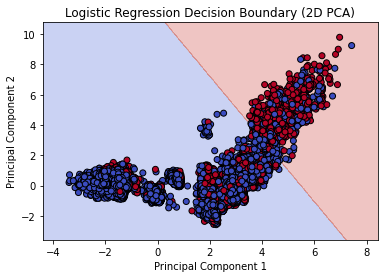

In [5]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA to reduce the dimensionality for visualization (using the first two principal components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Train Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_pca, y)

# Plot decision boundary
h = .02  # Step size in the mesh
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)

# Plot data points
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title('Logistic Regression Decision Boundary (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()


### Showing the Sigmoid Curve

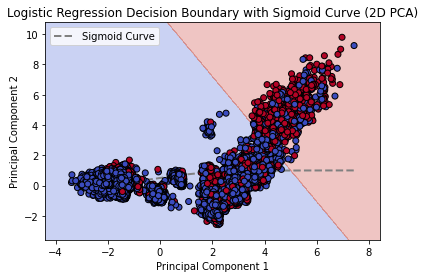

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Apply PCA to reduce the dimensionality for visualization (using the first two principal components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Train Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_pca, y)

# Plot sigmoid curve
x_sigmoid = np.linspace(X_pca[:, 0].min(), X_pca[:, 0].max(), 100)
y_sigmoid = sigmoid(x_sigmoid)
plt.plot(x_sigmoid, y_sigmoid, linestyle='dashed', color='gray', linewidth=2, label='Sigmoid Curve', zorder=2)

# Plot decision boundary
h = .02  # Step size in the mesh
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3, zorder=1)

# Plot data points
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', zorder=3)
plt.title('Logistic Regression Decision Boundary with Sigmoid Curve (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

plt.show()


## Confusion Matrix

A confusion matrix is a table used in machine learning and statistics to evaluate the performance of a classification algorithm. It is particularly useful for analyzing the performance of a model in terms of true positive (TP), true negative (TN), false positive (FP), and false negative (FN) predictions.

Here are the basic components of a confusion matrix:

1. __True Positive (TP)__: The number of instances correctly predicted as positive by the model.

2. __True Negative (TN)__: The number of instances correctly predicted as negative by the model.

3. __False Positive (FP)__: The number of instances incorrectly predicted as positive by the model. Also known as a Type I error.

4. __False Negative (FN)__: The number of instances incorrectly predicted as negative by the model. Also known as a Type II error.

### Using Confusion Matrix to find the Accuracy of the model : 

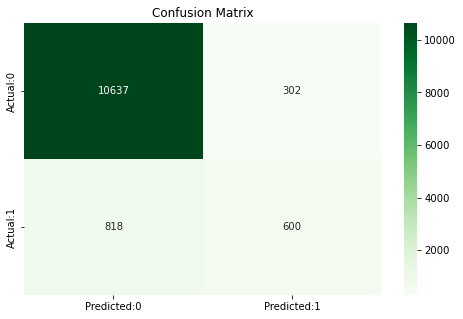

The details for confusion matrix are:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10939
           1       0.67      0.42      0.52      1418

    accuracy                           0.91     12357
   macro avg       0.80      0.70      0.73     12357
weighted avg       0.90      0.91      0.90     12357



In [7]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn

# Assuming you have already trained your logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])

# Plot confusion matrix
plt.figure(figsize=(8, 5))
sn.heatmap(conf_matrix, annot=True, fmt='d', cmap="Greens")
plt.title('Confusion Matrix')
plt.show()

# Classification report
print('The details for confusion matrix are:')
print(classification_report(y_test, y_pred))


### ROC Curve

#### What is ROC Curve?

Another tool to measure the classification model performance visually is ROC Curve. ROC Curve stands for Receiver Operating Characteristic Curve. An ROC Curve is a plot which shows the performance of a classification model at various classification threshold levels.

The ROC Curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold levels.

True Positive Rate (TPR) is also called Recall. It is defined as the ratio of TP to (TP + FN).
- Sensitivity: $  = \frac{\text{True Positives}}{\text{True Positives + False Negatives}} $

False Positive Rate (FPR) is defined as the ratio of FP to (FP + TN).
- False Positive Rate: $  = \frac{\text{False Positives}}{\text{False Positives + True Negatives}} $

In the ROC Curve, we will focus on the TPR (True Positive Rate) and FPR (False Positive Rate) of a single point. This will give us the general performance of the ROC curve which consists of the TPR and FPR at various threshold levels. So, an ROC Curve plots TPR vs FPR at different classification threshold levels. If we lower the threshold levels, it may result in more items being classified as positve. It will increase both True Positives (TP) and False Positives (FP).

The ROC curve is a graphical representation of the trade-off between true positive rate (sensitivity) and false positive rate (1-specificity) at various thresholds.

### ROC-AUC
ROC AUC stands for Receiver Operating Characteristic - Area Under Curve. It is a technique to compare classifier performance. In this technique, we measure the area under the curve (AUC). A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5.

So, ROC AUC is the percentage of the ROC plot that is underneath the curve.

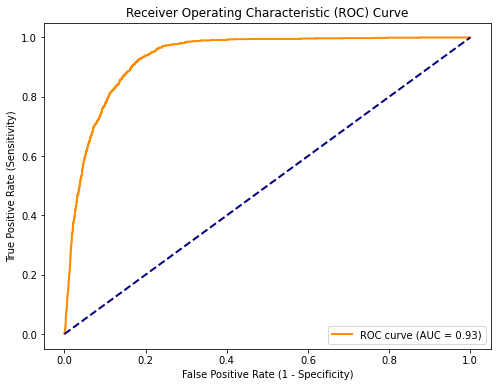

In [8]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming you have already trained your logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict probabilities of positive class
y_prob = logreg.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


### k-Fold Cross Validation


k-Fold Cross-Validation is a technique used in machine learning for model evaluation. The purpose of k-Fold Cross-Validation is to assess how well a predictive model generalizes to an independent dataset. It helps in providing a more robust estimate of the model's performance by reducing the variability that can be present in a single train-test split.

How k-Fold Cross-Validation works:

1. The dataset is divided into k equally sized folds.
2. The model is trained and evaluated k times, each time using a different fold as the test set and the remaining folds as the training set.
3. The performance metrics (such as accuracy, precision, recall, etc.) are then averaged over the k iterations to obtain a more stable estimate of the model's performance.

The key benefits of k-Fold Cross-Validation include:

1. __Reduced Variance__: By repeating the training and testing process k times with different subsets of data, k-Fold Cross-Validation helps reduce the impact of the randomness in a single train-test split.

2. __Better Performance Estimate__: It provides a more reliable estimate of how well a model will perform on unseen data compared to a single train-test split.

3. __Model Comparison__: When comparing multiple models, k-Fold Cross-Validation allows you to assess their average performance across different subsets of data.

4. __Detecting Overfitting or Underfitting__: By observing how well a model performs on both training and validation sets in each fold, you can gain insights into whether the model is overfitting or underfitting.

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Assuming you have features X and target variable y
model = LogisticRegression()

# Perform 5-fold Cross-Validation
cv_results = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Display Cross-Validation results
print("Cross-Validation Results:")
print("Accuracy for each fold:", cv_results)
print("Average Accuracy: {:.2f}".format(cv_results.mean()))

Cross-Validation Results:
Accuracy for each fold: [0.9109007  0.91102209 0.91041515 0.9113755  0.91052568]
Average Accuracy: 0.91


# END